In [0]:
import numpy as np
import re
import nltk
import contractions
import string
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim import utils 
from gensim.test.utils import get_tmpfile
from nltk.corpus import stopwords
import nltk
import en_core_web_sm
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
nlp = en_core_web_sm.load()
nltk.download('stopwords')
nltk.download('punkt')
porter=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
pip install contractions

     |████████████████████████████████| 317kB 7.7MB/s 
     |████████████████████████████████| 245kB 12.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81694 sha256=bf170169c19f71304ed38a124148a081b41871ea2f37b3cc78ef3784d4e4679c
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path_labelled = "/content/drive/My Drive/Colab Notebooks/Labelled_Dataset.csv";



data = pd.read_csv(path_labelled)
data.shape

(12582, 2)

In [0]:
path_unlabelled = "/content/drive/My Drive/Colab Notebooks/Unlabeled_dataset.csv";
data_unlabelled = pd.read_csv(path_unlabelled)
data_unlabelled.head(5)

,Label,Article
0,NaN,"A little less than a decade ago, hockey fans w..."
1,NaN,The writers of the HBO series The Sopranos too...
2,NaN,Despite claims from the TV news outlet to offe...
3,NaN,After receiving 'subpar' service and experienc...
4,NaN,After watching his beloved Seattle Mariners pr...


In [0]:
REGEX = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
             '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

NEWLINE_REGEX = ('[\n\r\t]')
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


def replace_ne(text: str, nlp) -> str:
    '''
    This function extracts the name entities, and then replace them with the ne labels.
    :param text:
    :type text:
    :return:
    :rtype:
    '''
    doc = nlp(text)
    for ent in doc.ents:
        text = text.replace(ent.text,ent.label_ )
    return text
def textClean(text):
    """
    Get rid of the non-letter and non-number characters
    """
    text = re.sub(REGEX, " ", text)
    text = re.sub(NEWLINE_REGEX, " ", text)
    text=re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return (text)

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def cleanup(text):
    text = textClean(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = replace_ne(text,nlp)
    text= replace_contractions(text)

    text= stemSentence(text)
    return text

In [0]:
#removing missing rows 
missing_rows=[]
for i in range(len(data)):
  if data.loc[i, 'Article'] != data.loc[i, 'Article']:
    missing_rows.append(i)
data = data.drop(missing_rows).reset_index().drop(['index'],axis=1)
#cleaning data 
for i in range(len(data)):
        data.loc[i, 'Article'] = cleanup(data.loc[i,'Article'])

#count of labels in the dataset 
data.groupby('Label').count()
data['Article'][0]

'know you are troubl person blood org rever journalist person still anchor chair sheepishli admit had not travel helicopt hit enemi fire brokaw want person head platter org sourc said make lot nois org lesser journalist produc would immedi fire suspend fals report date person date acknowledg repeatedli said aboard chopper hit rocketpropel grenad report trip gpe actual safe travel differ aircraft brokaw cardin still date news anchor person came back gpe expedit insid said knew stori person later spout bunk person former org news presid person knew fals stori long time extrem uncomfort it sourc said org news exec counsel stop tell tale person still took anchor seat date news broadcast date time work rock day despit call dismiss did not address issu broadcast go suspend reprimand way full support org news necardinalrk sourc said mani person colleagu believ claim simpli conflat cardin version happen date meet day take serious org sourc said believ person apolog air speak himself admit time

In [0]:
data['Article'][0]

NameError: ignored

In [0]:

data_train, data_test = train_test_split(data, 
                                         test_size=0.10, 
                                         random_state=42)


NameError: ignored

In [0]:
#converting data. into bool 
data['Label']= data['Label'].astype(int)

data['Article']= data['Article'].astype(str)
train_size = int(0.8 * len(data))
test_size = len(data) - train_size

#splitting into test and train
x_train= data.loc[:train_size,'Article'].values
y_train= data.loc[:train_size,'Label'].values
x_test= data.loc[(train_size+1):,'Article'].values
y_test= data.loc[(train_size+1):,'Label'].values

#converting into np arrray
y_train = np.array(y_train)
y_test = np.array(y_test)

len(x_train), len(y_train), len(x_test), len(y_test),y_test,y_train,
data['Article'][0]

'know you are troubl person blood org rever journalist person still anchor chair sheepishli admit had not travel helicopt hit enemi fire brokaw want person head platter org sourc said make lot nois org lesser journalist produc would immedi fire suspend fals report date person date acknowledg repeatedli said aboard chopper hit rocketpropel grenad report trip gpe actual safe travel differ aircraft brokaw cardin still date news anchor person came back gpe expedit insid said knew stori person later spout bunk person former org news presid person knew fals stori long time extrem uncomfort it sourc said org news exec counsel stop tell tale person still took anchor seat date news broadcast date time work rock day despit call dismiss did not address issu broadcast go suspend reprimand way full support org news necardinalrk sourc said mani person colleagu believ claim simpli conflat cardin version happen date meet day take serious org sourc said believ person apolog air speak himself admit time

In [0]:
data['Article'][0]

'know you are troubl person blood org rever journalist person still anchor chair sheepishli admit had not travel helicopt hit enemi fire brokaw want person head platter org sourc said make lot nois org lesser journalist produc would immedi fire suspend fals report date person date acknowledg repeatedli said aboard chopper hit rocketpropel grenad report trip gpe actual safe travel differ aircraft brokaw cardin still date news anchor person came back gpe expedit insid said knew stori person later spout bunk person former org news presid person knew fals stori long time extrem uncomfort it sourc said org news exec counsel stop tell tale person still took anchor seat date news broadcast date time work rock day despit call dismiss did not address issu broadcast go suspend reprimand way full support org news necardinalrk sourc said mani person colleagu believ claim simpli conflat cardin version happen date meet day take serious org sourc said believ person apolog air speak himself admit time

In [0]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer

max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 300
batch_size = 32

tokenizer=Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(data['Article'].values)
x_train_token=tokenizer.texts_to_sequences(x_train)
x_test_token=tokenizer.texts_to_sequences(x_test)

In [0]:
from gensim.models import Word2Vec
import numpy as np
# give a path of model to load function
#word_emb_model = Word2Vec.load(data['Article'].values)
#Creating frequency distribution of words using nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
text="""Achievers are not afraid of Challenges, rather they relish them, thrive in them, use them. Challenges makes is stronger.
        Challenges makes us uncomfortable. If you get comfortable with uncomfort then you will grow. Challenge the challenge """
#Tokenize the sentences from the text corpus
tokenized_text=sent_tokenize(text)
#using CountVectorizer and removing stopwords in english language
cv1= CountVectorizer(lowercase=True,stop_words='english')
#fitting the tonized senetnecs to the countvectorizer
text_counts=cv1.fit_transform(tokenized_text)
# printing the vocabulary and the frequency distribution pf vocabulary in tokinzed sentences
print(cv1.vocabulary_)
print(text_counts.toarray())

{'achievers': 0, 'afraid': 1, 'challenges': 3, 'relish': 7, 'thrive': 9, 'use': 12, 'makes': 6, 'stronger': 8, 'uncomfortable': 11, 'comfortable': 4, 'uncomfort': 10, 'grow': 5, 'challenge': 2}
[[1 1 0 1 0 0 0 1 0 1 0 0 1]
 [0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]]


In [0]:
x_train_seq = sequence.pad_sequences(x_train_token, maxlen=maxlen)
x_test_seq=sequence.pad_sequences(x_test_token, maxlen=maxlen)

#defining vocalbury size 
vocab_size = len(tokenizer.word_index)+1

In [0]:
x_train_seq

array([[    0,     0,     0, ...,    15,     1,   686],
       [    0,     0,     0, ...,  5223,   341,    35],
       [    0,     0,     0, ...,   495,   240,   240],
       ...,
       [ 7730, 19817,   323, ...,  7903,   435,    54],
       [ 2276,     1,  5521, ...,   368,   676,  2873],
       [    0,     0,     0, ...,  1195,    20,   537]], dtype=int32)

In [0]:
NUM_CLASSES=1
BATCH_SIZE = 32
NUM_EPOCHS = 10
minlen=1

In [0]:
inputs = input(shape=(maxlen, ))
fc1 = Dense(100, activation="relu")(inputs)
fc1_dropout = Dropout(0.2)(fc1)
fc2 = Dense(50, activation="relu")(fc1_dropout)
fc2_dropout = Dropout(0.2)(fc2)
outputs = Dense(NUM_CLASSES, activation="softmax")(fc1_dropout)

NameError: ignored

In [0]:
model = Model(inputs=inputs, outputs=outputs)

NameError: ignored

In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])

NameError: ignored

In [0]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 30,201
Trainable params: 30,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train_seq, y_train, batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS, validation_split=0.1)

Train on 9059 samples, validate on 1007 samples
Epoch 1/10
9059/9059 [==============================] - 1s 70us/step - loss: 11.6569 - accuracy: 0.2398 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 2/10
9059/9059 [==============================] - 1s 58us/step - loss: 11.6569 - accuracy: 0.2398 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 3/10
9059/9059 [==============================] - 1s 57us/step - loss: 11.6569 - accuracy: 0.2398 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 4/10
9059/9059 [==============================] - 1s 58us/step - loss: 11.6569 - accuracy: 0.2398 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 5/10
9059/9059 [==============================] - 1s 57us/step - loss: 11.6569 - accuracy: 0.2398 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 6/10
9059/9059 [==============================] - 1s 57us/step - loss: 11.6569 - accuracy: 0.2398 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 7/10
9059/9059 [========================

In [0]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 128, input_length=maxlen))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model_lstm.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model_lstm.summary(),vocab_size

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          18925696  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 18,975,169
Trainable params: 18,975,169
Non-trainable params: 0
_________________________________________________________________


(None, 147857)

In [0]:
print('Train...')
train_history = model_lstm.fit(x_train_seq, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=[x_test_seq, y_test])

Train...
Epoch 1/3
315/315 [==============================] - 83s 262ms/step - loss: 0.0690 - accuracy: 0.9782 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
315/315 [==============================] - 83s 263ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
315/315 [==============================] - 83s 264ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [0]:
#evaluating model
score, acc = model_lstm.evaluate(x_test_seq, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

79/79 [==============================] - 3s 42ms/step - loss: 0.6134 - accuracy: 0.7822
Test score: 0.6133818030357361
Test accuracy: 0.7821939587593079


NameError: ignored

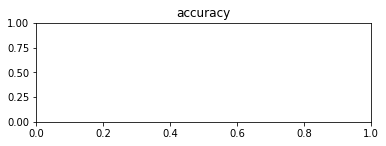

In [0]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["accuracy"], color="r", label="train")
plt.plot(history.history["val_accuracy"], color="b", label="val")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="val")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [0]:
%matplotlib inline
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

In [0]:
pip install keras

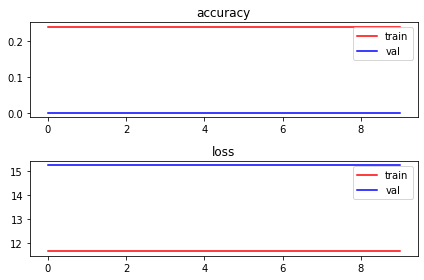

In [0]:

plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["accuracy"], color="r", label="train")
plt.plot(history.history["val_accuracy"], color="b", label="val")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="val")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [0]:
embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder-large/3")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(session.run(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


NameError: ignored

In [0]:
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/2" 
embed = hub.Module(module_url)

RuntimeError: Exporting/importing meta graphs is not supported when eager execution is enabled. No graph exists when eager execution is enabled.

In [0]:
import tensorflow as tf
with tf.compat.v1.Session() as session:
    session.run([tf.compat.v1.global_variables_initializer(), 
                 tf.compat.v1.tables_initializer()])
    training_embeddings = session.run(embed(data_train.Article.to_list()))

NameError: ignored